In [1]:
from __future__ import print_function
import os
%matplotlib inline

In [2]:
import glad_clusters.local_env as local_env
import glad_clusters.utils.service as us
import glad_clusters.utils.viewer as uv
reload(us)
reload(uv)
from glad_clusters.utils.service import ClusterService
from glad_clusters.utils.viewer import ClusterViewer

---
#### ENV VARS

In [3]:
None==os.environ.get('csv_bucket')

True

In [4]:
local_env.export()


EXPORTING dev ENV:
	width: 5
	iterations: 25
	csv_bucket: gfw-clusters-test
	url: http://wri-tiles.s3.amazonaws.com/glad_prod/tiles
	min_count: 25
	bucket: wri-tiles
	zoom: 12




In [5]:
os.environ.get('csv_bucket')

'gfw-clusters-test'

---
### ClusterService

In [6]:
bounds_manaus=[[-60.16113281250001,-3.2940822283128046],[-59.83154296874999,-2.964984369333955]]              

In [7]:
c=ClusterService(bounds=bounds_manaus)
c.request_size()

25

In [8]:
c.x_min,c.y_min,c.x_max,c.y_max

(1363, 2081, 1367, 2085)

In [9]:
%time c.run()
print('NB ERRORS:',c.errors().shape[0])
print('NB CLUSTERS:',c.dataframe().shape[0])

CPU times: user 956 ms, sys: 177 ms, total: 1.13 s
Wall time: 2min 48s
NB ERRORS: 0
NB CLUSTERS: 434


In [10]:
# prefix for file name, defaults to clusters
IDENT="dev_manaus"
filename=c.name(IDENT)

In [11]:
print('FILE WILL BE SAVED TO: {}'.format(filename))
%time c.save(IDENT)

FILE WILL BE SAVED TO: dev_manaus_2015-01-01:2018-02-09_1363:2081:1367:2085_12:5:25:25
CPU times: user 196 ms, sys: 18.8 ms, total: 215 ms
Wall time: 5.81 s


In [12]:
print("RESULTS ARE STORED IN DATAFRAME: ",c.dataframe().shape,c.dataframe(full=True).shape)
c.dataframe().sample(5)

RESULTS ARE STORED IN DATAFRAME:  (434, 9) (434, 15)


,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
152,61,169,20150328,20180122,-2.945623,-59.933824,1366,2081,20180209::21:21:25
90,45,536,20150328,20170823,-3.234379,-60.185777,1363,2084,20180209::21:21:26
292,98,714,20150811,20170823,-3.114618,-60.132698,1363,2083,20180209::21:21:25
417,45,343,20150515,20180122,-3.220614,-60.047220,1364,2084,20180209::21:21:25
200,177,482,20150920,20170823,-3.331416,-59.845588,1367,2085,20180209::21:21:25


In [13]:
print("CLUSTER DATA FOR A CLUSTER")
c.cluster(15)

CLUSTER DATA FOR A CLUSTER


count                        56
area                        508
min_date               20150328
max_date               20171010
longitude              -3.22406
latitude               -60.1241
x                          1363
y                          2084
timestamp    20180209::21:21:26
Name: 15, dtype: object

In [14]:
print("CONVEX HULL VERTICES FOR A CLUSTER")
c.convex_hull(15)

CONVEX HULL VERTICES FOR A CLUSTER


array([[253, 177],
       [240, 195],
       [238, 196],
       [224, 181],
       [231, 163],
       [252, 176],
       [253, 177]])

In [15]:
print("CLUSTER DATA FOR ALL CLUSTERS ON A TILE:",c.tile(15).shape)
c.tile(15).head()

CLUSTER DATA FOR ALL CLUSTERS ON A TILE: (42, 9)


,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
1,39,205,20151006,20180106,-3.163832,-60.128217,1363,2084,20180209::21:21:26
10,25,71,20150616,20171010,-3.242294,-60.119600,1363,2084,20180209::21:21:26
11,103,698,20150718,20170924,-3.196869,-60.119600,1363,2084,20180209::21:21:26
12,248,1075,20150328,20180106,-3.179663,-60.120979,1363,2084,20180209::21:21:26
13,34,147,20150328,20171010,-3.209602,-60.121668,1363,2084,20180209::21:21:26


---
# Viewer

In [17]:
reload(us)
reload(uv)
from glad_clusters.utils.service import ClusterService
from glad_clusters.utils.viewer import ClusterViewer

In [18]:
print("RELOADING FROM FILE ({})".format(filename))
%time c=ClusterService.read_csv(filename)
c.dataframe().head()

RELOADING FROM FILE (dev_manaus_2015-01-01:2018-02-09_1363:2081:1367:2085_12:5:25:25)
CPU times: user 110 ms, sys: 13.5 ms, total: 124 ms
Wall time: 2.01 s


,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
0,32,166,20150216,20180106,-2.944590,-60.203355,1363,2081,20180209::21:21:26
1,39,205,20151006,20180106,-3.163832,-60.128217,1363,2084,20180209::21:21:26
2,26,172,20170823,20171119,-2.946655,-59.816981,1367,2081,20180209::21:21:26
3,28,45,20150625,20171010,-2.905005,-59.813879,1367,2081,20180209::21:21:26
4,31,68,20171103,20180106,-2.951130,-59.812155,1367,2081,20180209::21:21:26


In [19]:
print("RELOADING FROM INSTANCE")
c=ClusterService(bounds=bounds_manaus)
%time c.read("dev_manaus")
c.dataframe().head()

RELOADING FROM INSTANCE
CPU times: user 76 ms, sys: 9.69 ms, total: 85.7 ms
Wall time: 830 ms


,count,area,min_date,max_date,longitude,latitude,x,y,timestamp
0,32,166,20150216,20180106,-2.944590,-60.203355,1363,2081,20180209::21:21:26
1,39,205,20151006,20180106,-3.163832,-60.128217,1363,2084,20180209::21:21:26
2,26,172,20170823,20171119,-2.946655,-59.816981,1367,2081,20180209::21:21:26
3,28,45,20150625,20171010,-2.905005,-59.813879,1367,2081,20180209::21:21:26
4,31,68,20171103,20180106,-2.951130,-59.812155,1367,2081,20180209::21:21:26


In [20]:
view=ClusterViewer(c)

VIEW TILE:


/Users/brook/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


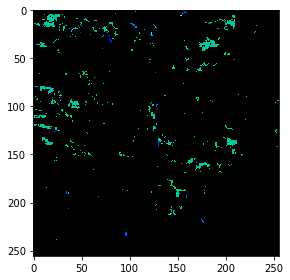

In [21]:
print("VIEW TILE:")
view.tile(36)

VIEW INPUT:
NB CLUSTERS: 20
TOTAL COUNT: 1455
TOTAL AREA: 7996
DATES: 2015-03-28 to 2018-01-30


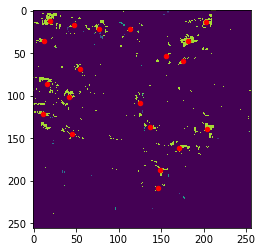

In [22]:
print("VIEW INPUT:")
view.input(36)

VIEW INPUT (without centroids):
NB CLUSTERS: 20
TOTAL COUNT: 1455
TOTAL AREA: 7996
DATES: 2015-03-28 to 2018-01-30


/Users/brook/anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


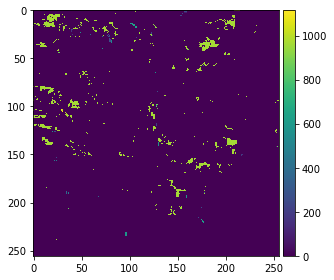

In [23]:
print("VIEW INPUT (without centroids):")
view.input(36,centroids=False)

VIEW SINGLE CLUSTER:
COUNT: 38
AREA: 333
POINT: 119,239
ZXY: 12/1366/2081
DATES: 2015-03-28 to 2017-10-11


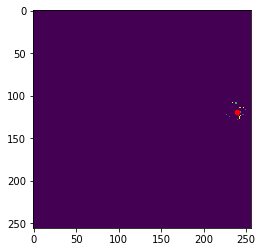

In [24]:
print("VIEW SINGLE CLUSTER:")
view.cluster(158)

VIEW SINGLE CLUSTER (with convex hull):
COUNT: 38
AREA: 333
POINT: 119,239
ZXY: 12/1366/2081
DATES: 2015-03-28 to 2017-10-11


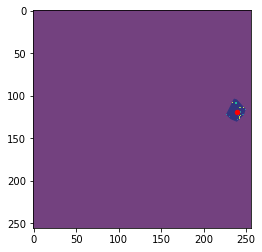

In [25]:
print("VIEW SINGLE CLUSTER (with convex hull):")
view.cluster(158,convex_hull=True)

VIEW SINGLE CLUSTER (without centriods):
COUNT: 28
AREA: 192
POINT: 50,212
ZXY: 12/1366/2082
DATES: 2015-09-12 to 2017-10-03


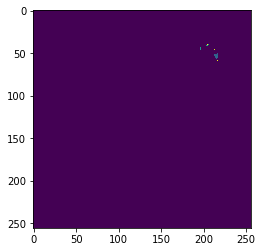

In [26]:
print("VIEW SINGLE CLUSTER (without centriods):")
view.cluster(123,centroids=False)

VIEW CLUSTERS BY LIST (with convex_hull)


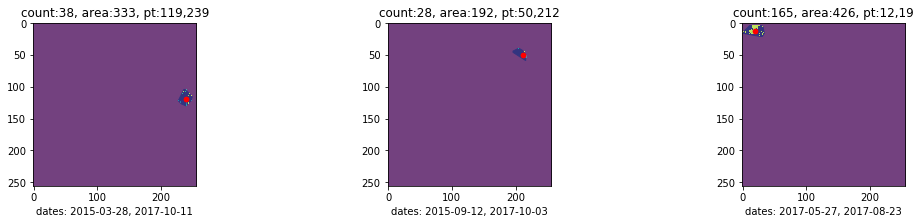

In [27]:
print("VIEW CLUSTERS BY LIST (with convex_hull)")
view.clusters(row_ids=[158,123,36],convex_hull=True)

VIEW CLUSTERS BY START,END-INDICIES (without centroids):


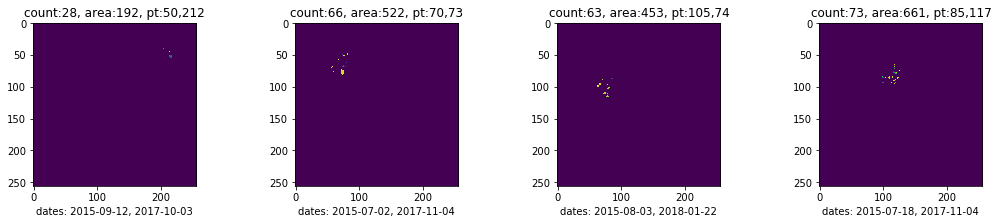

In [28]:
print("VIEW CLUSTERS BY START,END-INDICIES (without centroids):")
view.clusters(start=123,end=127,centroids=False)

---
## DOCS

---
#### ClusterService

In [29]:
help(ClusterService)

Help on class ClusterService in module glad_clusters.utils.service:

class ClusterService(__builtin__.object)
 |  ClusterService:
 |  
 |  Creates service for running cluster algorithm and/or viewing 
 |  the resulting cluster data.
 |  
 |  Args:
 |      Use one of the following to select tiles to run:
 |  
 |          bounds<list>: tiles-lonlat bounding box
 |          tile_bounds<list>: tiles-xy bounding box
 |          lat,lon<int,int>: latitude,longitude used to run a single tile
 |          x,y<int,int>: tile-xy used to run a single tile
 |  
 |      Other run arguments:
 |  
 |          start_date<str>: 'yyyy-mm-dd'
 |          end_date<str>: 'yyyy-mm-dd'
 |          min_count<int>: minimum number of alerts in a cluster
 |          width<int>: gaussian width in cluster algorithm
 |          iterations<int>: number of times to iterate when finding clusters
 |          z<int>: tile-zoom
 |          bucket<str>: aws-bucket used for saving csv file
 |  
 |      Preloaded dataframe a

---
#### ClusterViewer

In [30]:
help(ClusterViewer)

Help on class ClusterViewer in module glad_clusters.utils.viewer:

class ClusterViewer(__builtin__.object)
 |  ClusterViewer:
 |          
 |  Easily plot data from ClusterService.
 |  
 |  Args:
 |      service<cluster_service>: ClusterService instance
 |      url_base<str>: aws-bucket url for glad-tiles (defaults to environ['url'])
 |  
 |  Methods defined here:
 |  
 |  __init__(self, service, url_base=None)
 |      # PUBLIC METHODS
 |  
 |  cluster(self, row_id, centroids=True, convex_hull=False, info=True)
 |      show the cluster
 |      
 |      Args:
 |          row_id<int>: row id for a cluster on the tile of interest
 |          centroids<bool[True]>: if true plot the cluster centroids
 |          convex_hull<bool[True]>: if true shade the convex_hull
 |          info<bool[True]>: if true print the cluster data
 |  
 |  clusters(self, start=None, end=None, row_ids=[], centroids=True, convex_hull=False)
 |      show clusters
 |      
 |      Use one of the following:
 |       